In [1]:
import pickle 
import os
import matplotlib.pyplot as plt

exp = "para2"

with open(f"./results/{exp}/accuracies.pkl", "rb") as f:
    acc = pickle.load(f)

In [2]:
func_list = ["facility-location", "disparity-min",  "disparity-sum", "graph-cut"]
func_dic = {}
func_dic["facility-location"] = "fl"
func_dic["disparity-min"] = "dm"
func_dic["disparity-sum"] = "ds"
func_dic["graph-cut"] = "gc"

rev_func_dic = {}

rev_func_dic["fl"] = "facility-location"
rev_func_dic["dm"] = "disparity-min"
rev_func_dic["ds"] = "disparity-sum"
rev_func_dic["gc"] = "graph-cut"

In [3]:
dir_ls = os.listdir(f"./results/{exp}/accuracies/")
for i, s in enumerate(dir_ls):
    dir_ls[i]=dir_ls[i].split(".")[0]

In [4]:
print(len(dir_ls))
print(dir_ls[0])

12
disparity-sum_disparity-min_facility-location_graph-cut


In [5]:
acc_new = {}
for key, value in acc.items():
    f1, f2, f3, f4 = key.split("_")
    name = func_dic[f1]+"_"+func_dic[f2]+"_"+func_dic[f3]+"_"+func_dic[f4]
    acc_new[name] = value

In [9]:
import csv
file_name = f'./results/{exp}/accuracies.csv'

with open(file_name, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    first_row = ["order"]
    
    for i in range(40):
        first_row.extend([f"epoch {i+1}"])
    
    writer.writerow(first_row)

    for key, value in acc_new.items():
        row = [key]
        row.extend(value)
        writer.writerow(row)

In [17]:
file_name = f'./results/{exp}/accuracies2.csv'

with open(file_name, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    first_row = ["order"]
    
    for i in range(len(acc_new["fl_gc_dm_ds"])):
        first_row.extend([f"epoch {i+1}"])
    
    writer.writerow(first_row)

    for name in dir_ls:
        path = f"./results/{exp}/accuracies/{name}.txt"

        with open(path, mode="r") as f:
            acc_exp = f.read()
        
        f1, f2, f3, f4 = name.split("_")
        key = func_dic[f1]+"_"+func_dic[f2]+"_"+func_dic[f3]+"_"+func_dic[f4]
        row = [key]
        row.extend(acc_exp)
        writer.writerow(row)
        
    # for key, value in acc_new.items():
    #     row = [key]
    #     row.extend(value)
    #     writer.writerow(row)

./results/para/accuracies/disparity-sum_disparity-min_facility-location_graph-cut.txt
./results/para/accuracies/disparity-min_facility-location_disparity-sum_graph-cut.txt
./results/para/accuracies/facility-location_disparity-min_disparity-sum_graph-cut.txt
./results/para/accuracies/disparity-sum_facility-location_graph-cut_disparity-min.txt
./results/para/accuracies/disparity-sum_graph-cut_facility-location_disparity-min.txt
./results/para/accuracies/graph-cut_disparity-sum_facility-location_disparity-min.txt
./results/para/accuracies/facility-location_disparity-sum_disparity-min_graph-cut.txt
./results/para/accuracies/disparity-min_graph-cut_disparity-sum_facility-location.txt
./results/para/accuracies/graph-cut_disparity-min_disparity-sum_facility-location.txt
./results/para/accuracies/graph-cut_facility-location_disparity-sum_disparity-min.txt
./results/para/accuracies/disparity-sum_facility-location_disparity-min_graph-cut.txt
./results/para/accuracies/disparity-min_graph-cut_faci

In [9]:
order_ls = []
order_ls.append("fl_dm_gc_ds")
order_ls.append("fl_ds_gc_dm")
order_ls.append("fl_gc_ds_dm")
order_ls.append("dm_ds_gc_fl")
order_ls.append("ds_dm_gc_fl")

def analysis(order1, order2, exp, epochs):
    x = range(epochs)

    f1, f2, f3, f4 = order1.split("_")
    with open(f"./results/{exp}/accuracies.pkl", "rb") as f:
        acc = pickle.load(f)
    
    try:
        acc1 = acc[f"{rev_func_dic[f1]}_{rev_func_dic[f2]}_{rev_func_dic[f3]}_{rev_func_dic[f4]}"]
    except:
        print("order 1 does not exits!")
        return 

    f1, f2, f3, f4 = order2.split("_")
    
    try:
        acc2 = acc[f"{rev_func_dic[f1]}_{rev_func_dic[f2]}_{rev_func_dic[f3]}_{rev_func_dic[f4]}"]
    except:
        print("order 1 does not exits!")
        return 


    plt.clf()
    plt.plot(x, acc1, label=order1)
    plt.plot(x, acc2, label=order2)

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{order1}_{order2} Accuracy Plot")

    plt.show()

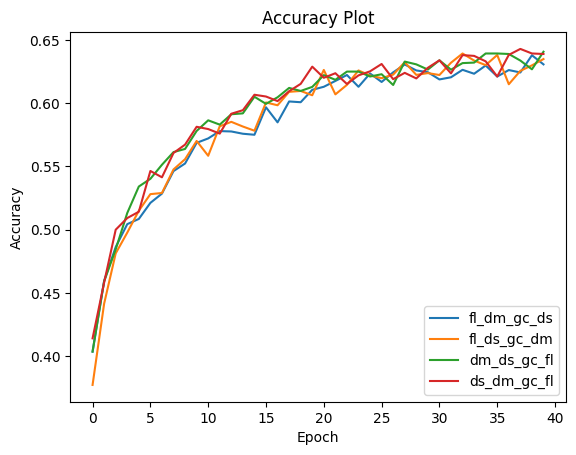

In [10]:
order_ls = []
order_ls.append("fl_dm_gc_ds")
order_ls.append("fl_ds_gc_dm")
# order_ls.append("fl_gc_ds_dm")
order_ls.append("dm_ds_gc_fl")
order_ls.append("ds_dm_gc_fl")

plt.clf()

with open(f"./results/{exp}/accuracies.pkl", "rb") as f:
    acc = pickle.load(f)

for order in order_ls:
    x = range(40)
    f1, f2, f3, f4 = order.split("_")
    acc_order = acc[f"{rev_func_dic[f1]}_{rev_func_dic[f2]}_{rev_func_dic[f3]}_{rev_func_dic[f4]}"]
    plt.plot(x, acc_order)  # Don't set label here

# After plotting all lines, set legend entries manually
plt.legend([order for order in order_ls])  # Use list comprehension to get labels

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title(f"Accuracy Plot")
plt.show()
